In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import json
import seaborn as sns

# Characters NaN

In [2]:
char_processed = pd.read_csv(
    "/home/sevashasla/epfl/sem1/ada-2024-project-cyberbab00shka/data/MovieSummaries/character_processed.csv",
    parse_dates=["actor_date_of_birth", "movie_release_date"],
)

In [85]:
char_processed.isna().sum(axis=0) / char_processed.shape[0]

Wikipedia movie ID                 0.000000
Freebase movie ID                  0.000000
Character name                     0.557159
Actor gender                       0.006152
Actor height (in meters)           0.553138
Actor ethnicity (Freebase ID)      0.705642
Actor name                         0.000039
Freebase character/actor map ID    0.000000
Freebase character ID              0.557147
Freebase actor ID                  0.000000
actor_date_of_birth                0.000000
movie_release_date                 0.000000
ethn_name                          0.742623
race                               0.742623
dtype: float64

As we can see there are a lot of missing values:
- Character name                     ~55%
- Actor height (in meters)           ~55%
- Freebase character ID              ~55%
- Actor ethnicity (Freebase ID)      ~70%
- ethn_name                          ~74%
- race                               ~74%

In [87]:
char_processed.isna().sum(axis=1).value_counts()

6    103185
4     54281
3     53046
5     44665
0     40255
2     26844
1     11133
7      1577
8         1
Name: count, dtype: int64

# Movies NaN

In [175]:
movies_processed = pd.read_csv(
    "/home/sevashasla/epfl/sem1/ada-2024-project-cyberbab00shka/data/MovieSummaries/movie_processed.csv",
    parse_dates=["movie_release_date"],
)

In [89]:
movies_processed.isna().sum(axis=0) / movies_processed.shape[0]

Wikipedia movie ID          0.000000
Freebase movie ID           0.000000
Movie name                  0.000000
Movie box office revenue    0.897224
Movie runtime               0.250180
languages                   0.000000
movie_release_date          0.084437
countries_old               0.000000
countries                   0.000000
genres                      0.000000
dtype: float64

Let's also consider the number of NaN in plot_summaries

In [119]:
all_plots_wikiids = set()

with open("/home/sevashasla/epfl/sem1/ada-2024-project-cyberbab00shka/data/MovieSummaries/plot_summaries.txt") as f:
    lines = f.read().splitlines()
    for line in lines:
        wikiid, plot_summ = line.split("\t")
        if len(plot_summ) > 0:
            all_plots_wikiids.add(int(wikiid))

len(set(movie_raw["Wikipedia movie ID"].values.tolist()) - all_plots_wikiids) / len(movie_raw)

0.4836495761001211

- Movie box office revenue    ~90%
- Movie runtime               ~25%
- movie_release_date          ~10%
- plot_summary                ~50%

# Descriptive statistics for characters

In [3]:
char_processed = char_processed.rename(columns={
    'Wikipedia movie ID': "wikipedia_movie_id",
    'Freebase movie ID': "fb_movie_id",
    'Character name': "character_name",
    'Actor gender': "actor_gender",
    'Actor height (in meters)': "actor_height",
    'Actor ethnicity (Freebase ID)': "fb_actor_eth_id",
    'Actor name': "actor_name",
    'Freebase character/actor map ID': "fb_char_actor_map_id",
    'Freebase character ID': "fb_char_id",
    'Freebase actor ID': "fb_actor_id",
})

char_processed

,wikipedia_movie_id,fb_movie_id,character_name,actor_gender,actor_height,fb_actor_eth_id,actor_name,fb_char_actor_map_id,fb_char_id,fb_actor_id,actor_date_of_birth,movie_release_date,ethn_name,race
0,975900,/m/03vyhn,Akooshay,F,1.620,NaN,Wanda De Jesus,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,1958-08-26,2001-08-24,NaN,NaN
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,F,1.780,/m/044038p,Natasha Henstridge,/m/0jys3m,/m/0bgchn4,/m/0346l4,1974-08-15,2001-08-24,NaN,NaN
2,975900,/m/03vyhn,Desolation Williams,M,1.727,/m/0x67,Ice Cube,/m/0jys3g,/m/0bgchn_,/m/01vw26l,1969-06-15,2001-08-24,African American,African
3,975900,/m/03vyhn,Sgt Jericho Butler,M,1.750,NaN,Jason Statham,/m/02vchl6,/m/0bgchnq,/m/034hyc,1967-09-12,2001-08-24,NaN,NaN
4,975900,/m/03vyhn,Bashira Kincaid,F,1.650,NaN,Clea DuVall,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,1977-09-25,2001-08-24,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334982,913762,/m/03pcrp,UN Spacy Commander,M,NaN,NaN,Sonny Byrkett,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1954-01-01,1992-05-21,NaN,NaN
334983,913762,/m/03pcrp,Silvie Gena,F,NaN,NaN,Susan Byrkett,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1958-01-01,1992-05-21,NaN,NaN
334984,913762,/m/03pcrp,Elensh,F,NaN,NaN,Dorothy Elias-Fahn,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1970-05-01,1992-05-21,NaN,NaN
334985,913762,/m/03pcrp,Hibiki,M,NaN,NaN,Jonathan Fahn,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1965-04-12,1992-05-21,NaN,NaN


Get the independent pandas table (dont look at the movies ids)

In [12]:
char_indep = char_processed[["actor_gender", "actor_height", "actor_name", "actor_date_of_birth", "fb_actor_id", "ethn_name", "race"]].drop_duplicates(subset=["fb_actor_id"])

In [15]:
char_indep["actor_gender"].value_counts()

actor_gender
M    36053
F    21022
Name: count, dtype: int64

we need to drop some values which are too high and not realistic

In [16]:
char_indep.loc[char_indep["actor_height"] > 3, "actor_height"] = char_indep.loc[char_indep["actor_height"] <= 3, "actor_height"].max()

In [18]:
char_indep[["actor_height", "actor_gender"]].groupby(by="actor_gender").describe()

actor_height                                                     
                    count      mean       std    min   25%   50%    75%    max
actor_gender                                                                  
F                  5541.0  1.658681  0.077256  0.610  1.60  1.66  1.702  1.910
M                  6700.0  1.800782  0.100692  0.813  1.75  1.80  1.850  2.356

In [19]:
char_indep[['actor_height', 'actor_name']].sort_values(by='actor_height', ascending=True).head(10)

,actor_height,actor_name
328375,0.610,Kara Hoffman
328376,0.610,Shelby Hoffman
6664,0.813,Verne Troyer
23365,0.830,Weng Weng
15070,0.880,Angelo Rossitto
91266,0.940,Ian Michael Smith
74137,1.000,Laurent Lucas
82771,1.060,Taylor Geare
57257,1.060,Arturo Gil
3475,1.067,Phil Fondacaro


It is noticeable that M are higher than F, but let's consider that's going on in every race

<Axes: xlabel='actor_gender', ylabel='actor_height'>

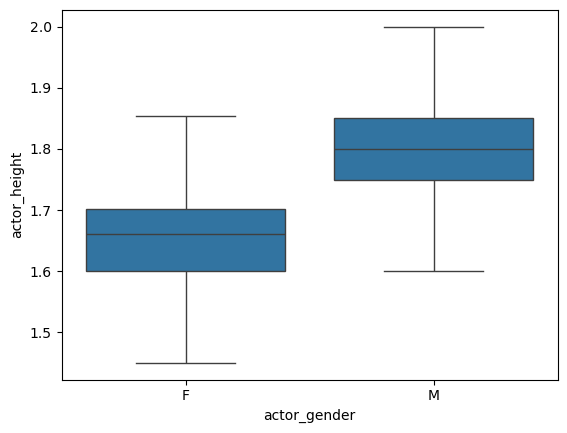

In [21]:
sns.boxplot(data=char_indep, x="actor_gender", y="actor_height", showfliers=False)

M is higher than F noticeably almost for every race except Carribean, where they are almost the same

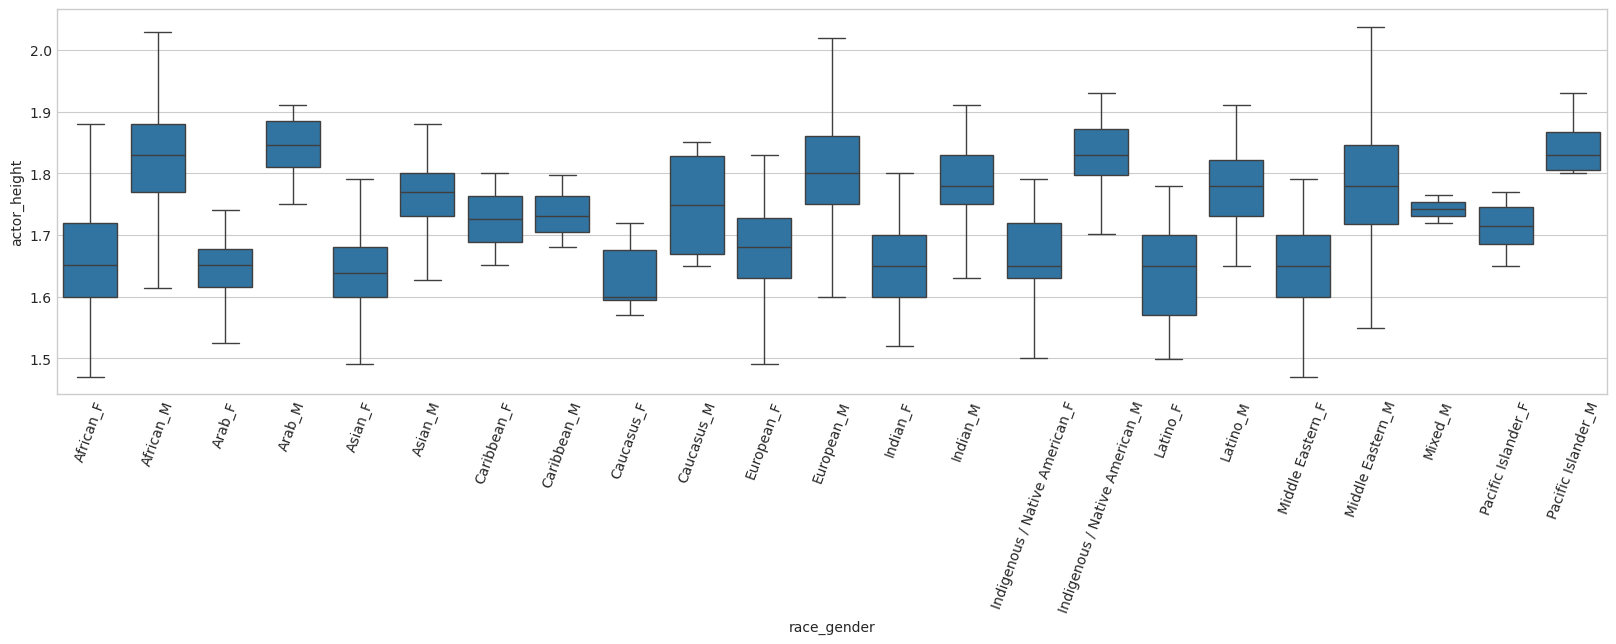

In [55]:
# char_indep["race_gender"] = char_indep["race"] + "_" + char_indep["actor_gender"]

with plt.style.context("seaborn-v0_8-whitegrid"):
    plt.figure(figsize=(20, 5))

    sns.boxplot(
        data=char_indep, 
        x="race_gender", 
        y="actor_height", 
        showfliers=False, 
        order=char_indep["race_gender"].dropna().sort_values().unique()
    )
    plt.xticks(rotation=70)

Now let's consider the ratio between M and F in every race.\
It can be seen that the ratios are almost the same in the Asian group. They are completely different in Carribean group, where more than 70% of actors are male.

In [80]:
char_indep_gender_by_race = char_indep[["actor_gender", "race"]].groupby("race")["actor_gender"].value_counts().unstack(fill_value=0).reset_index()
char_indep_gender_by_race["total"] = char_indep_gender_by_race[["F", "M"]].sum(axis=1)

char_indep_gender_by_race["F"] /= char_indep_gender_by_race["total"]
char_indep_gender_by_race["M"] /= char_indep_gender_by_race["total"]

<Axes: title={'center': 'Gender by race'}, ylabel='race'>

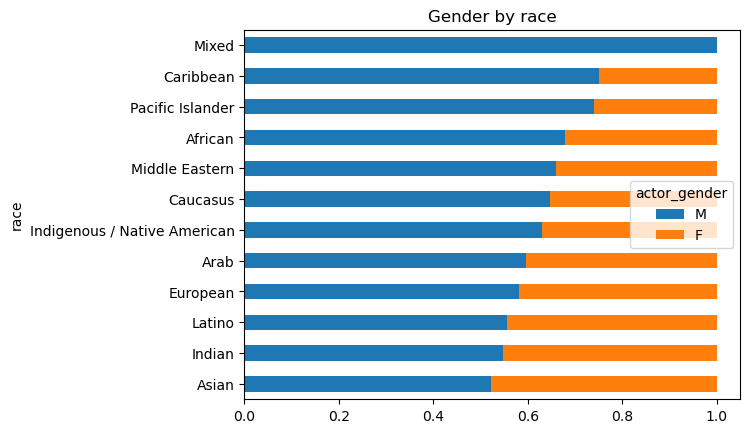

In [89]:
char_indep_gender_by_race[["race", "M", "F"]].sort_values(by="M", ascending=True).plot(
    x="race",
    kind="barh",
    stacked=True,
    title="Gender by race",
    mark_right=True,
)

It also might be instumental to know the distribution of races.\
It can be seen that Europeans are the hugest part, and together with Africans they are about 60% of the whole races distribution

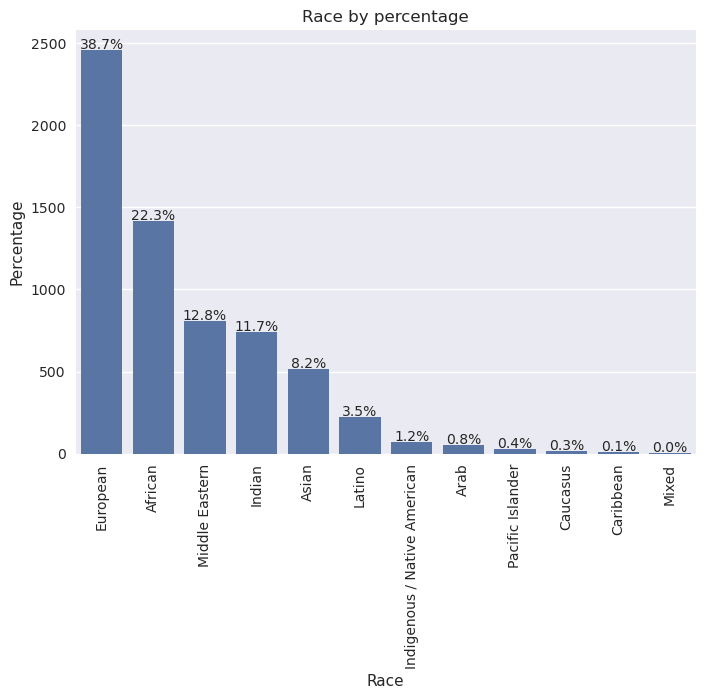

In [97]:
# Taken from https://www.kaggle.com/code/werooring/nfl-big-data-bowl-basic-eda-for-beginner
def write_percent(ax, total_size):
    '''Traverse the figure object and display the ratio at the top of the bar graph.'''
    for patch in ax.patches:
        height = patch.get_height() # Figure height (number of data)
        width = patch.get_width() # Figure width
        left_coord = patch.get_x() # The x-axis position on the left edge of the figure
        percent = height/total_size*100 # percent
        
        # Type text in the (x, y) coordinates
        ax.text(x=left_coord + width/2.0, # x-axis position
                y=height + total_size*0.001, # y-axis position
                s=f'{percent:1.1f}%', # Text
                ha='center') # in the middle


with plt.style.context('seaborn-v0_8'):
    plt.title("Race by percentage")
    ax = sns.countplot(x=char_indep.race, order=char_indep.race.value_counts().sort_values(ascending=False).index)
    write_percent(ax, len(char_indep.race.dropna()))
    plt.xlabel("Race")
    plt.xticks(rotation=90)
    plt.ylabel("Percentage")

We plan to also look at the distribution of date of births.\
One can notice that the it has mode at ~1970. \
Surprusingly, the peacks for M and F are different (1970 and 1980 respectively).\


*The peak might be because of the following reasons:*
1. *Movie industry became much more famous*
2. *The overall population was increasing*
3. *And much more, we do not know a lot about History of that time...*

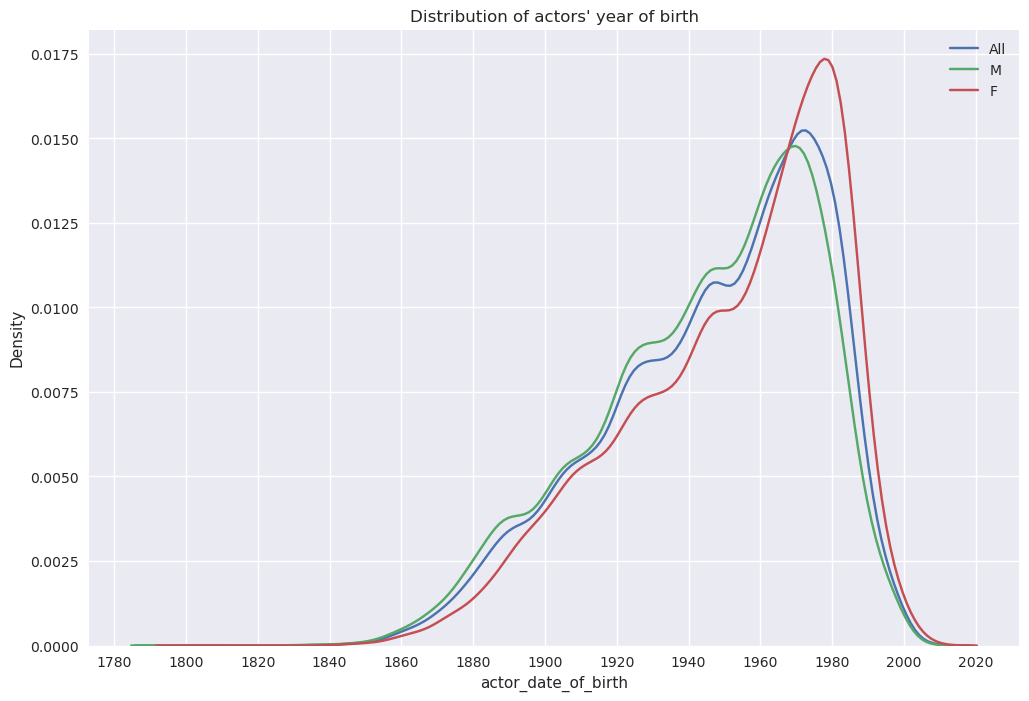

In [173]:
with plt.style.context('seaborn-v0_8'):
    plt.figure(figsize=(12, 8))
    plt.title("Distribution of actors' year of birth")
    sns.kdeplot(char_indep.actor_date_of_birth.dt.year, label="All")
    sns.kdeplot(char_indep.query("actor_gender=='M'").actor_date_of_birth.dt.year, label="M")
    sns.kdeplot(char_indep.query("actor_gender=='F'").actor_date_of_birth.dt.year, label="F")
    plt.xticks(ticks=[i for i in range(1780, 2021, 20)])
    plt.legend()

# Descriptive statistics for movies

In [180]:
movies_processed.rename(columns={
    "Wikipedia movie ID": "wikipedia_movie_id",
    "Freebase movie ID": "fb_movie_id",
    "Movie name": "movie_name",
    "Movie box office revenue": "revenue",
    "Movie runtime": "movie_runtime",
}, inplace=True)

In [190]:
movies_processed

,wikipedia_movie_id,fb_movie_id,movie_name,revenue,movie_runtime,languages,movie_release_date,countries_old,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,['english'],2001-08-24,['United States of America'],['United States of America'],"['Action', 'Horror', 'Science Fiction', 'Adven..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,['english'],2000-02-16,['United States of America'],['United States of America'],"['Crime', 'Mystery', 'Biography', 'Drama']"
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,['norwegian'],1988-01-01,['Norway'],['Norway'],"['Drama', 'Crime']"
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,['english'],1987-01-01,['United Kingdom'],['United Kingdom'],"['Erotic', 'Thriller']"
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,['german'],1983-01-01,['Germany'],['Germany'],['Drama']
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,['english'],2011-03-19,['United States of America'],['United States of America'],['Drama']
81737,34980460,/m/0g4pl34,Knuckle,NaN,96.0,['english'],2011-01-21,"['Ireland', 'United Kingdom']","['Ireland', 'United Kingdom']","['Documentary', 'Drama', 'Biography']"
81738,9971909,/m/02pygw1,Another Nice Mess,NaN,66.0,['english'],1972-09-22,['United States of America'],['United States of America'],"['Satire', 'Comedy']"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,['japanese'],1992-05-21,['Japan'],['Japan'],"['Japanese Cinema', 'Cartoon', 'Science Fictio..."


Let's check out some simple distributions and statistics

In [327]:
movies_processed.sort_values(by="revenue", ascending=False).head(10)[["movie_name", "revenue"]]

,movie_name,revenue
23702,Avatar,2.782275e+09
22256,Titanic,2.185372e+09
28192,The Avengers,1.511758e+09
30278,Harry Potter and the Deathly Hallows – Part 2,1.328111e+09
18645,Transformers: Dark of the Moon,1.123747e+09
80920,The Lord of the Rings: The Return of the King,1.119930e+09
54719,The Dark Knight Rises,1.078009e+09
69586,Toy Story 3,1.063172e+09
14303,Pirates of the Caribbean: On Stranger Tides,1.043872e+09
50039,Star Wars Episode I: The Phantom Menace,1.027045e+09


In [330]:
movies_processed.sort_values(by="movie_runtime", ascending=False).head(10)[["movie_name", "movie_runtime"]]

,movie_name,movie_runtime
12804,Zero Tolerance,1079281.00
62962,Modern Times Forever,14400.00
71100,Cinématon,9360.00
21733,Matrjoschka,5700.00
46666,The Cure for Insomnia,5220.00
16316,Paradise in Harlem,5100.00
27036,Kai Koduttha Dheivam,4875.27
68223,The Longest Most Meaningless Movie in the World,2880.00
73658,Gigantor,2425.00
73630,Dil Ne Phir Yaad Kiya,1966.00


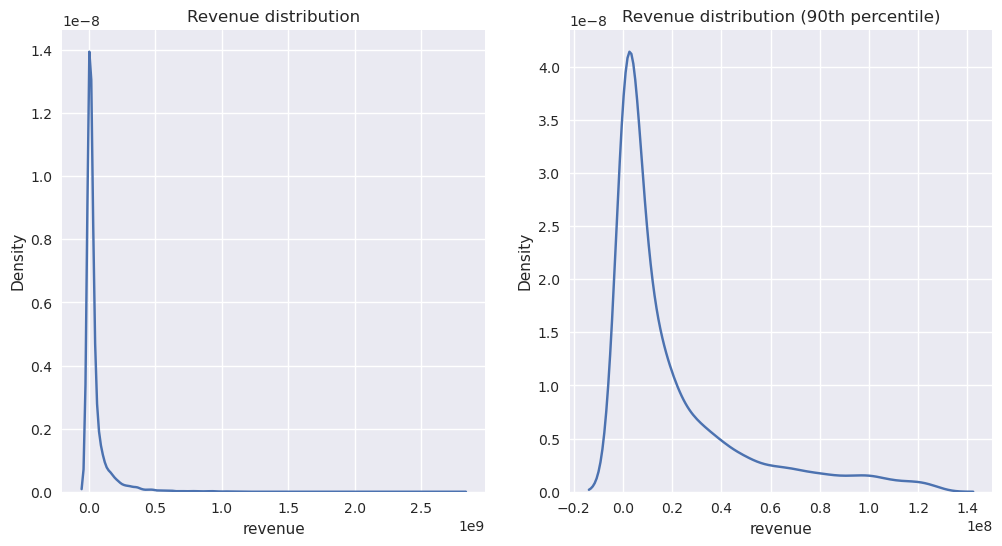

In [325]:
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Revenue distribution")
    sns.kdeplot(movies_processed["revenue"])
    plt.subplot(1, 2, 2) 
    plt.title("Revenue distribution (90th percentile)")
    sns.kdeplot(movies_processed["revenue"][movies_processed["revenue"] < movies_processed["revenue"].quantile(0.9)])

It is also usefull to check out the distribution of genres, languages, and countries.

1. The most frequent genre is Drama (17%), then Comedy (10%), then Romance, Action, Thriller (5%)
2. The most frequent language is english (50%), then hindi, spanish, french (4.5%)
3. The most frequent country is US (40%), India and UK (10%), then France, Germany and Italy (4-5%)

  0%|          | 0/81741 [00:00<?, ?it/s]

100%|██████████| 81741/81741 [00:13<00:00, 6232.46it/s]


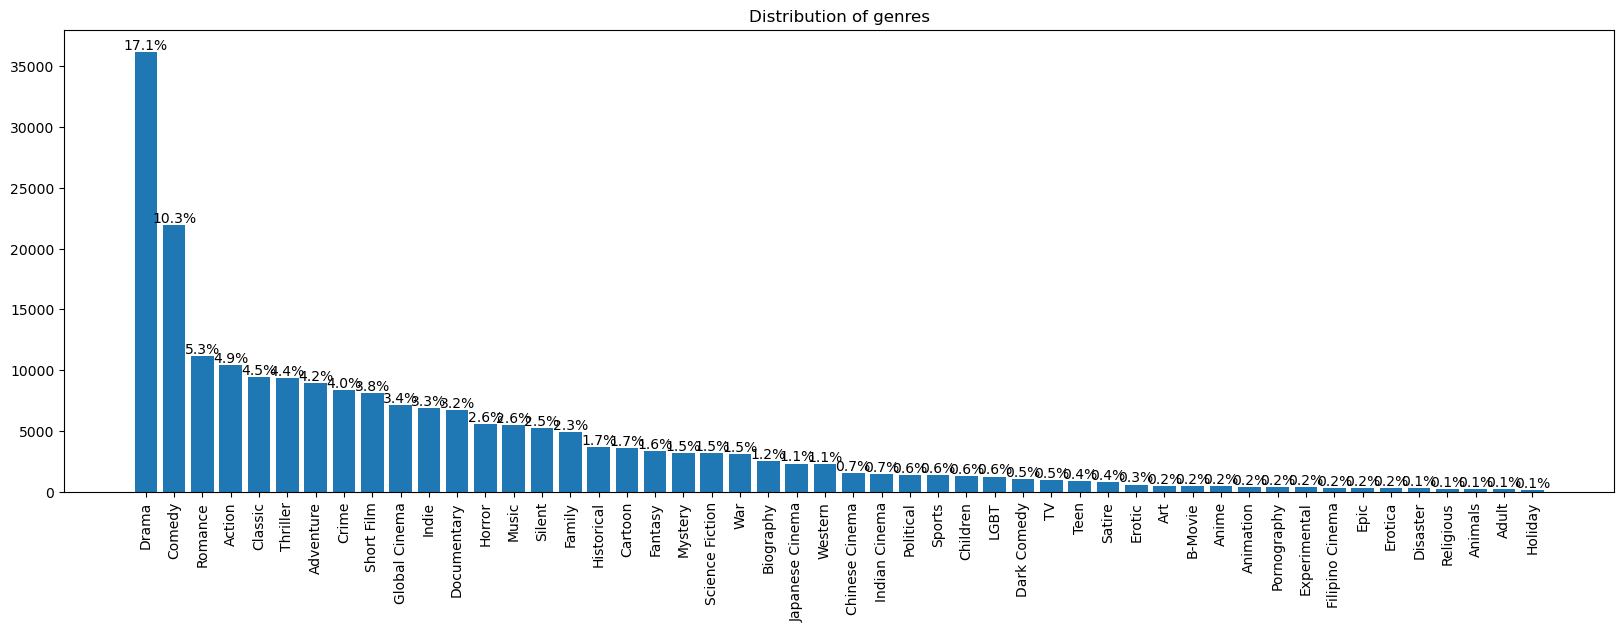

100%|██████████| 81741/81741 [00:11<00:00, 7373.35it/s]


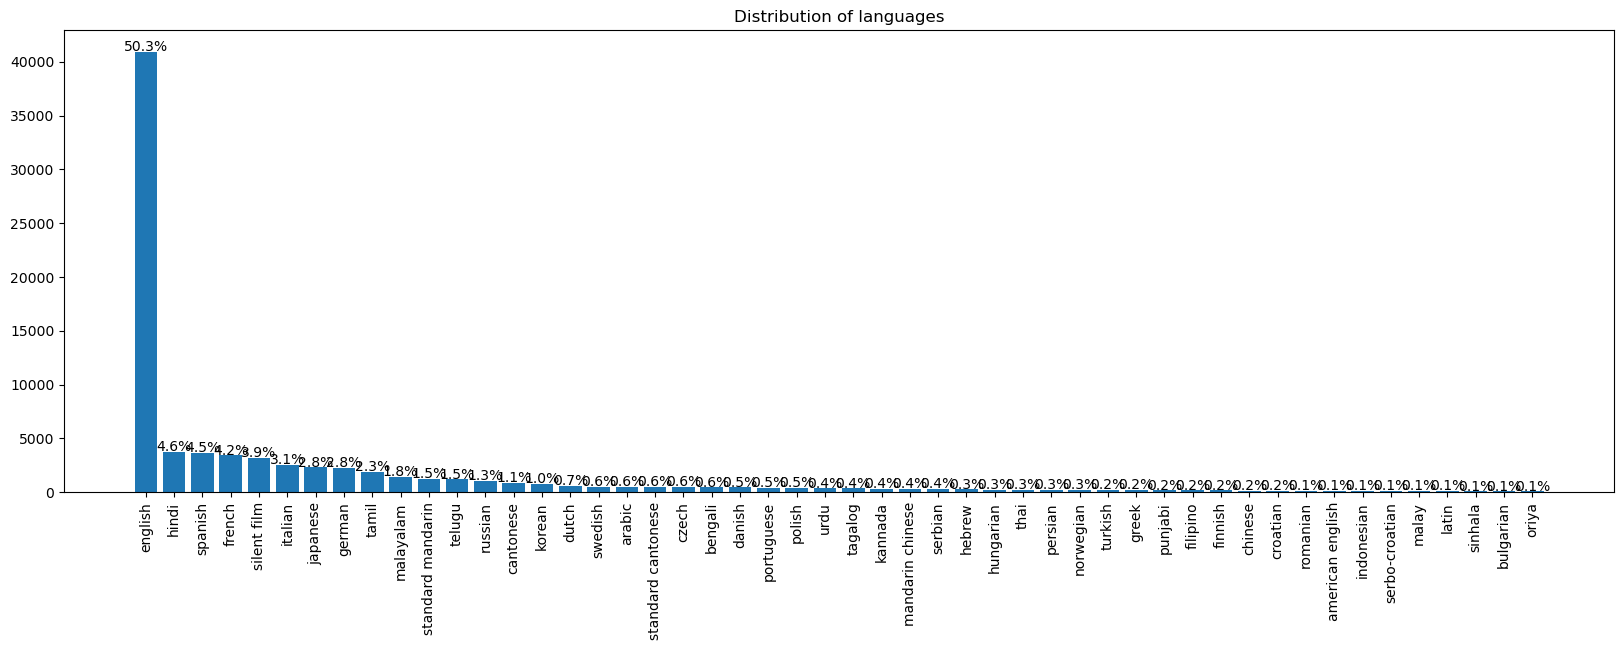

100%|██████████| 81741/81741 [00:19<00:00, 4124.20it/s]


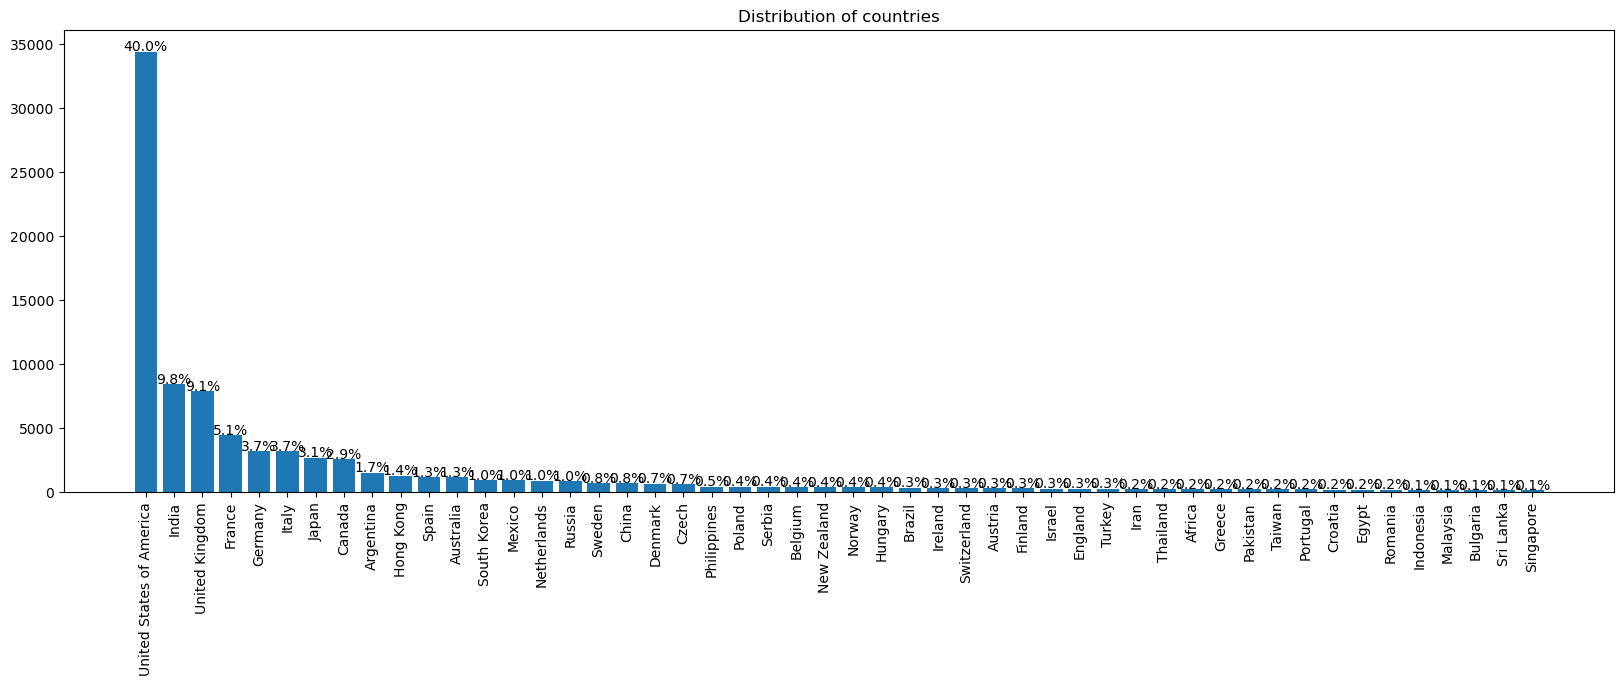

In [310]:
def get_distribution_from_list(data, column_of_list):
    data = data.copy().dropna(subset=[column_of_list])
    list_to_values = {}
    for _, row in tqdm(data.iterrows(), total=data.shape[0]):
        for el in eval(row[column_of_list]):
            if not el in list_to_values:
                list_to_values[el] = 0
            list_to_values[el] += 1
    result = pd.DataFrame(pd.Series(list_to_values)).reset_index().rename(columns={0: "value", "index": "smth"})
    result.sort_values("value", ascending=False, inplace=True)
    result_cut = result.iloc[:50]
    plt.bar(result_cut["smth"], result_cut["value"])
    write_percent(plt.gca(), result["value"].sum())
    plt.xticks(rotation=90)

for column in ["genres", "languages", "countries"]:
    plt.figure(figsize=(20, 6))
    plt.title(f"Distribution of {column}")
    get_distribution_from_list(movies_processed, column)
    plt.show()

In [316]:
def list_to_values(data, column_of_list, column_value, use_sum):
    data = data.copy()
    list_to_values = {}
    for _, row in tqdm(data.iterrows(), total=data.shape[0]):
        value = row[column_value]
        if value is None:
            continue
        for el in eval(row[column_of_list]):
            if not el in list_to_values:
                list_to_values[el] = []
            list_to_values[el].append(value)

    for key in list_to_values:
        if use_sum:
            list_to_values[key] = np.sum(list_to_values[key])
        else:
            list_to_values[key] = np.median(list_to_values[key])
    return pd.DataFrame(pd.Series(list_to_values)).reset_index().rename(columns={0: "value", "index": "smth"})

def get_distribution_by(data, column=None, func_to_apply=None, column_to_apply=None, title="", use_sum=False):
    '''
    This function helps to get the distribution of the data by:
    1. Year
    2. County
    3. Genre
    4. Language

    It also plots the distribution of the data by the above-mentioned categories.
    '''
    data = data.copy().dropna(subset=[column])
    if not func_to_apply is None:
        data[column] = data[column_to_apply].apply(func_to_apply)
    
    # by year
    data["year"] = data["movie_release_date"].dt.year
    if use_sum:
        by_year = pd.DataFrame(data.groupby("year")[column].sum()).reset_index()
    else:
        by_year = pd.DataFrame(data.groupby("year")[column].mean()).reset_index()

    # by country
    by_country = list_to_values(data, "countries", column, use_sum=use_sum)
    
    # by genre
    by_genre = list_to_values(data, "genres", column, use_sum=use_sum)
    
    # by language
    by_language = list_to_values(data, "languages", column, use_sum=use_sum)

    with plt.style.context("seaborn-v0_8"):
        plt.figure(figsize=(15, 30))
        plt.suptitle(title)
        for i, by_smth, name in zip(
                [0, 1, 2, 3], 
                [by_year, by_country, by_genre, by_language], ["year", "country", "genre", "language"]
            ):
            plt.subplot(4, 1, i + 1)
            plt.title(name)
            if i == 0:
                by_smth = by_smth.sort_values("year")
                xname = "year"
                yname = column
            else:
                by_smth = by_smth.sort_values("value", ascending=False)
                xname = "smth"
                yname = "value"
                by_smth = by_smth.iloc[:50]
            plt.plot(by_smth[xname], by_smth[yname])
            plt.xticks(rotation=90, ha='right')
        plt.tight_layout(rect=[0, 0.01, 1, 0.95])
    return by_year, by_country, by_genre, by_language

1. Revenue increases throughout the years
2. US, UK have the biggest revenue
3. Adventure and Drama genres have the biggest revenue
4. Cinemas made in english have the biggest revenue

  0%|          | 0/8401 [00:00<?, ?it/s]

100%|██████████| 8401/8401 [00:02<00:00, 3794.01it/s]


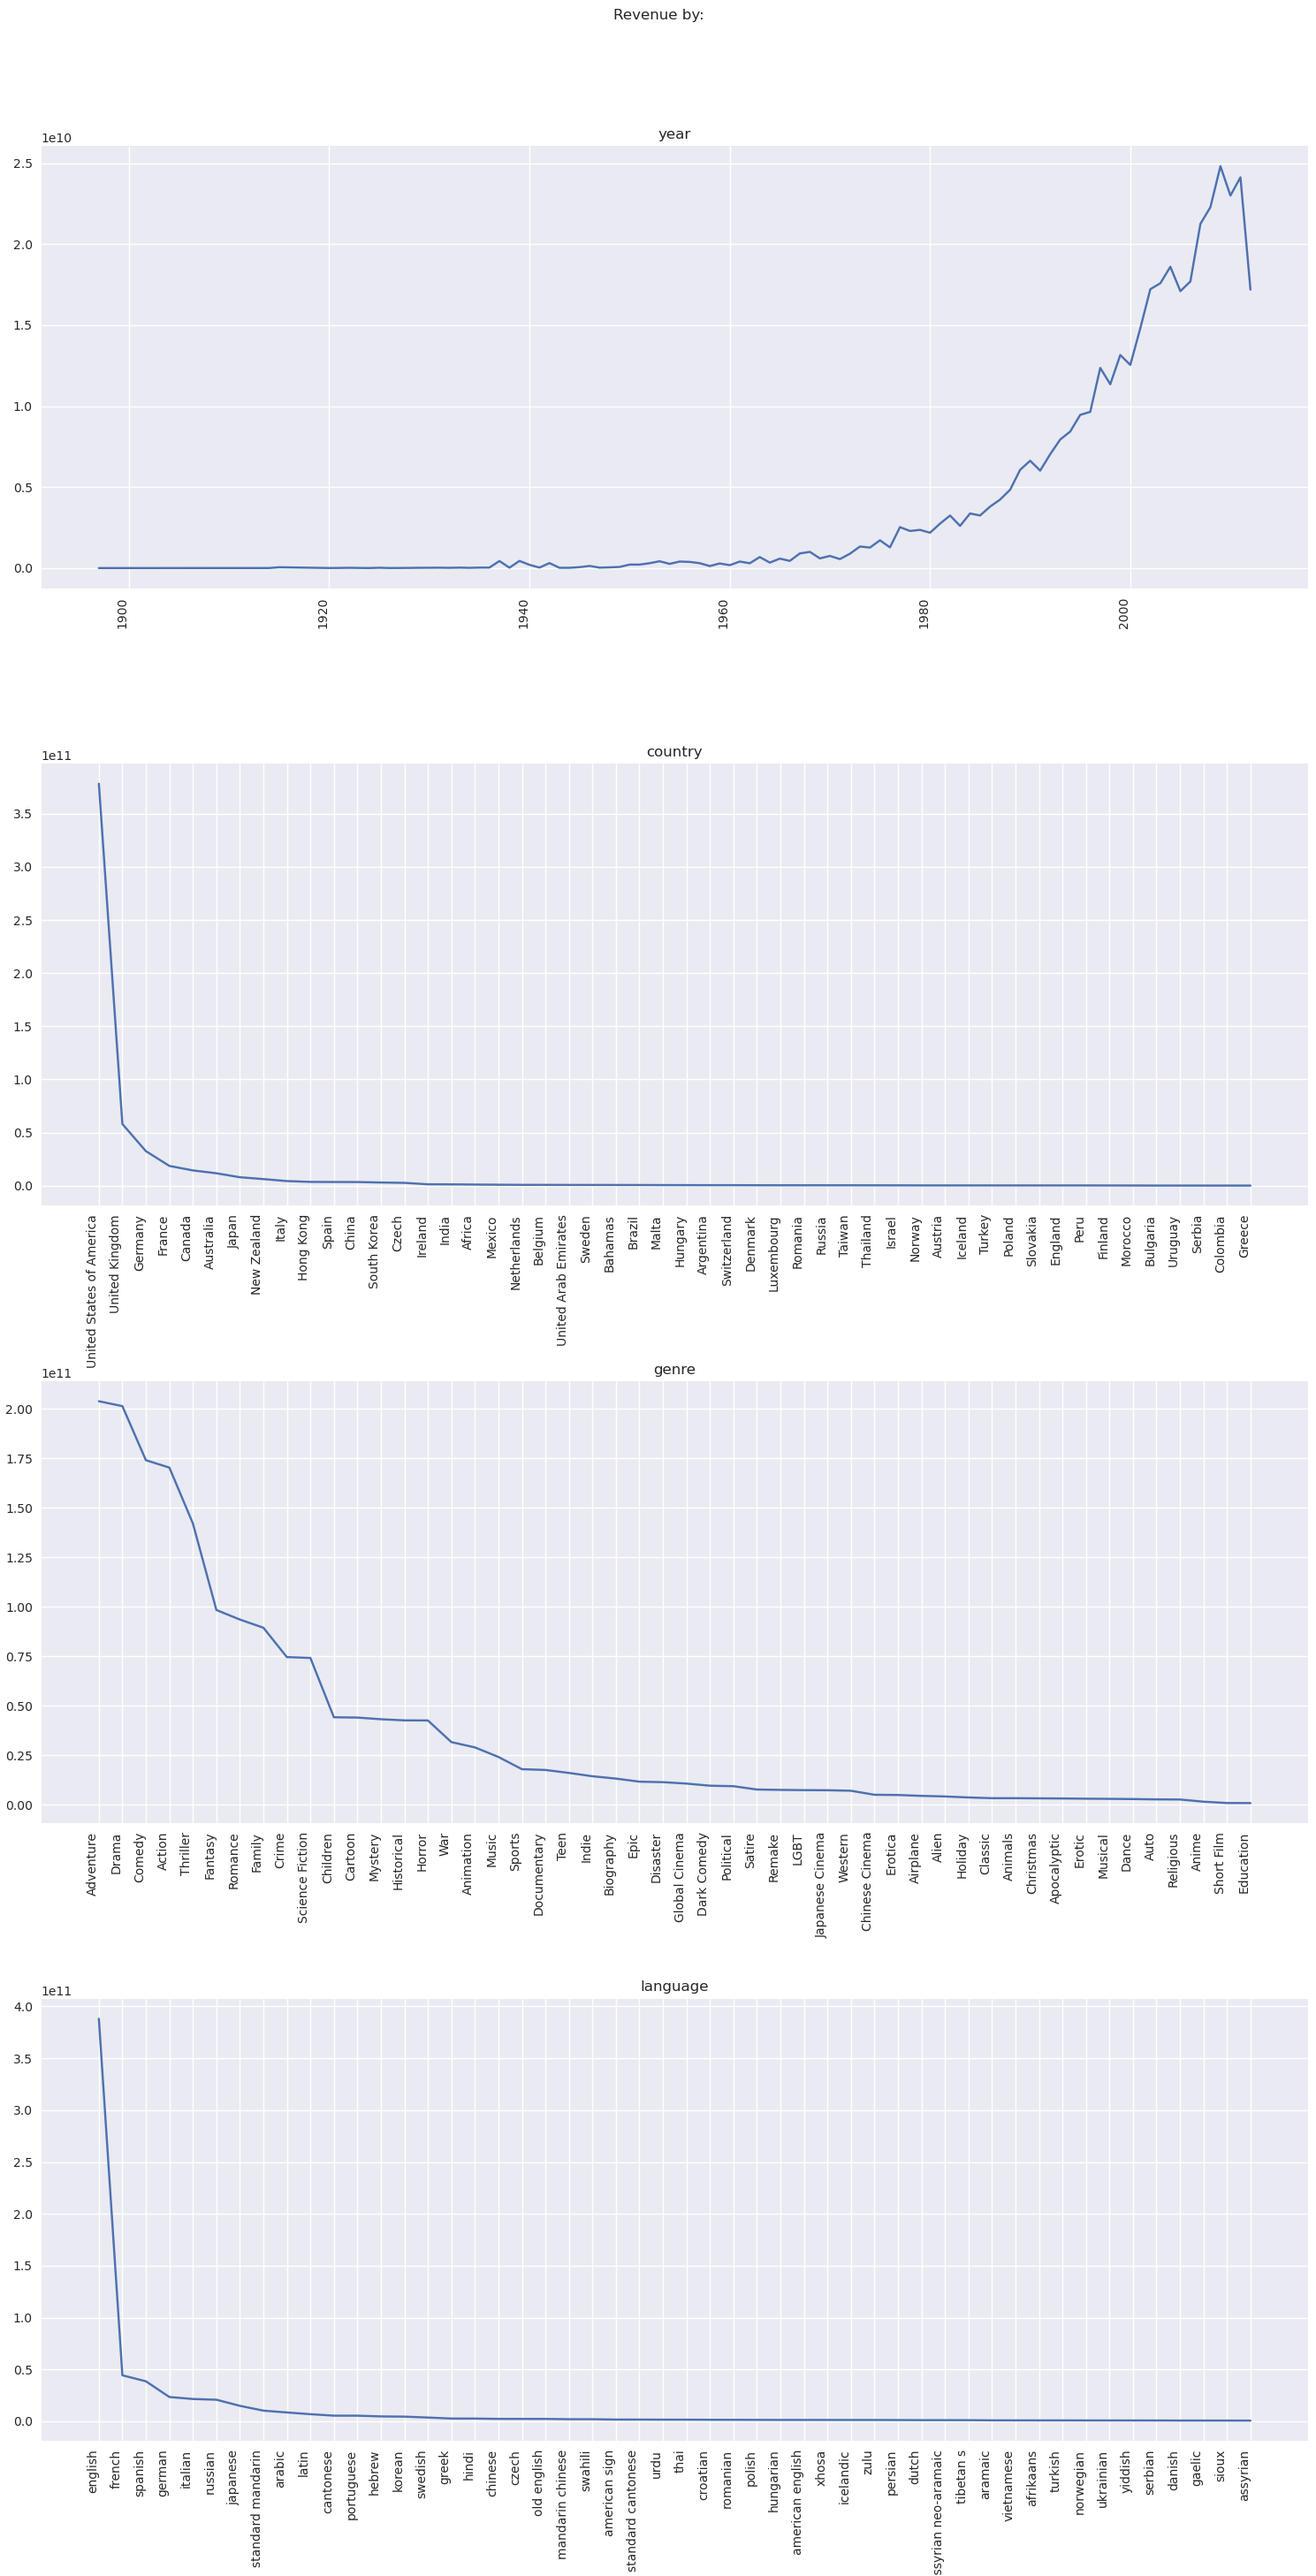

In [317]:
get_distribution_by(movies_processed, "revenue", title="Revenue by:", use_sum=True);

Let's also consider the **average** revenue

1. Average revenue increases throughout the years
2. For some reason Bahamas, Malta and Peru have the biggest average revenue
3. Apocalyptic genre has the biggest Average revenue
4. Cinemas made in old english have the biggest average revenue

  0%|          | 0/8401 [00:00<?, ?it/s]

100%|██████████| 8401/8401 [00:01<00:00, 7626.94it/s]


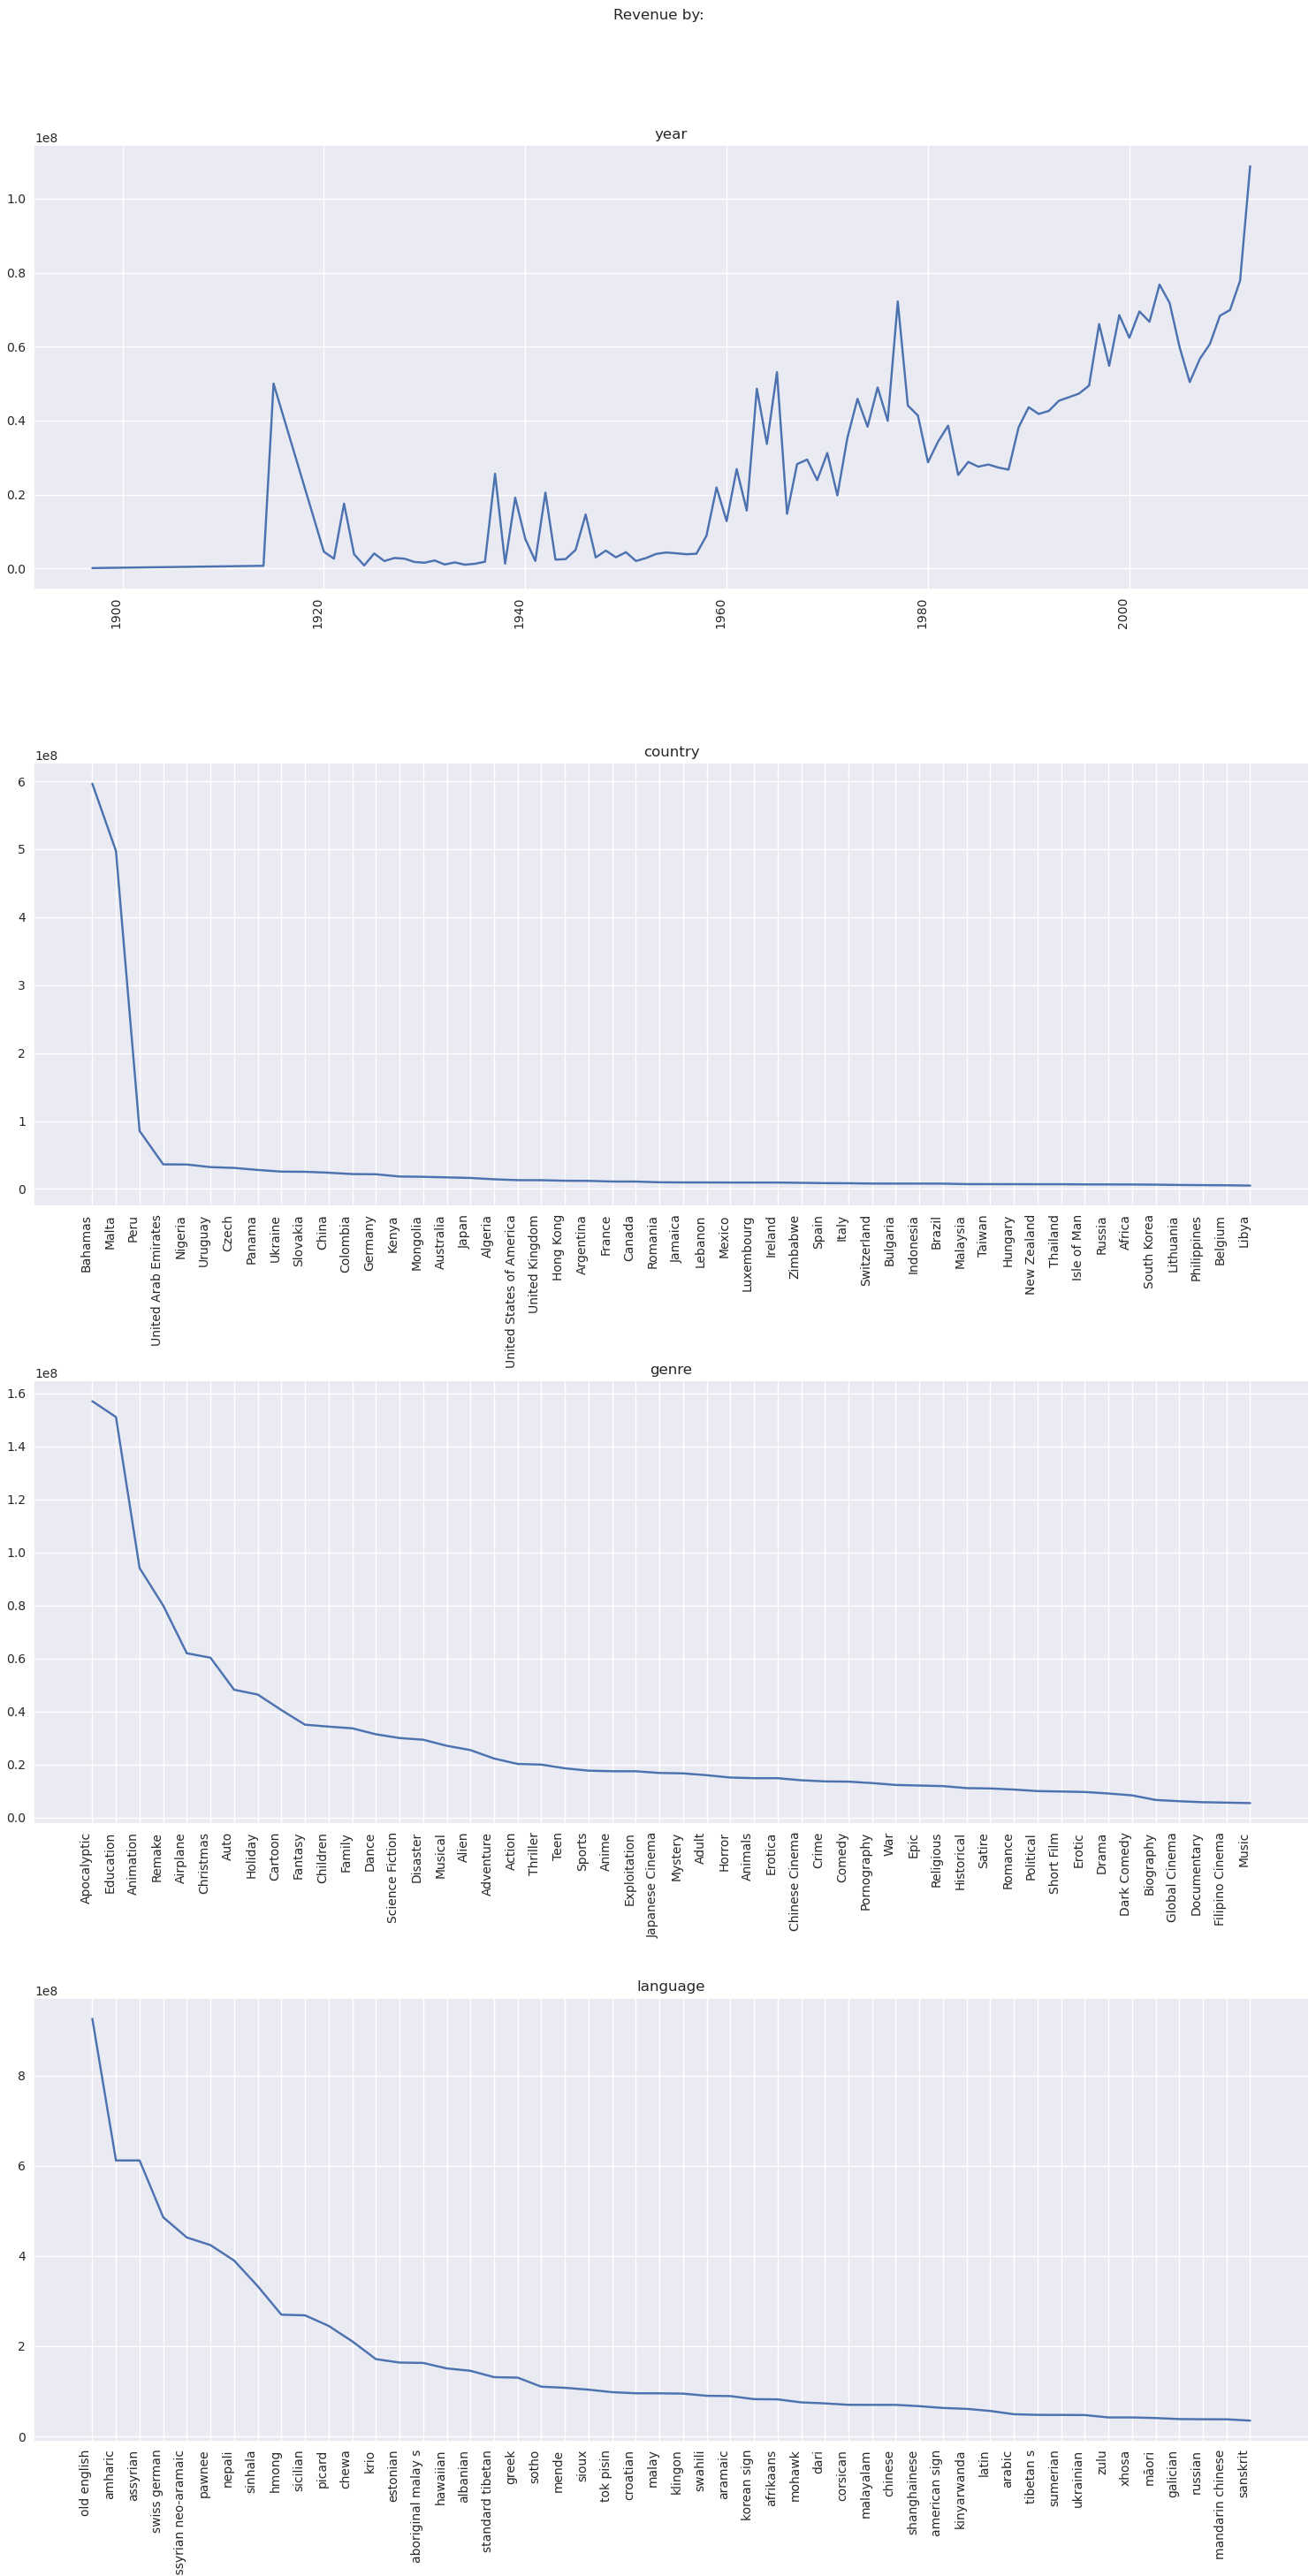

In [287]:
get_distribution_by(movies_processed, "revenue", title="Revenue by:", use_sum=False);

1. Runtime increases throughout the years
2. Libya and some Indian countries (or countries which are close to it) have the biggest runtime.
3. Serial have the highest runtime (obviously), then its indian cinema

  0%|          | 0/61291 [00:00<?, ?it/s]

100%|██████████| 61291/61291 [00:09<00:00, 6504.73it/s]


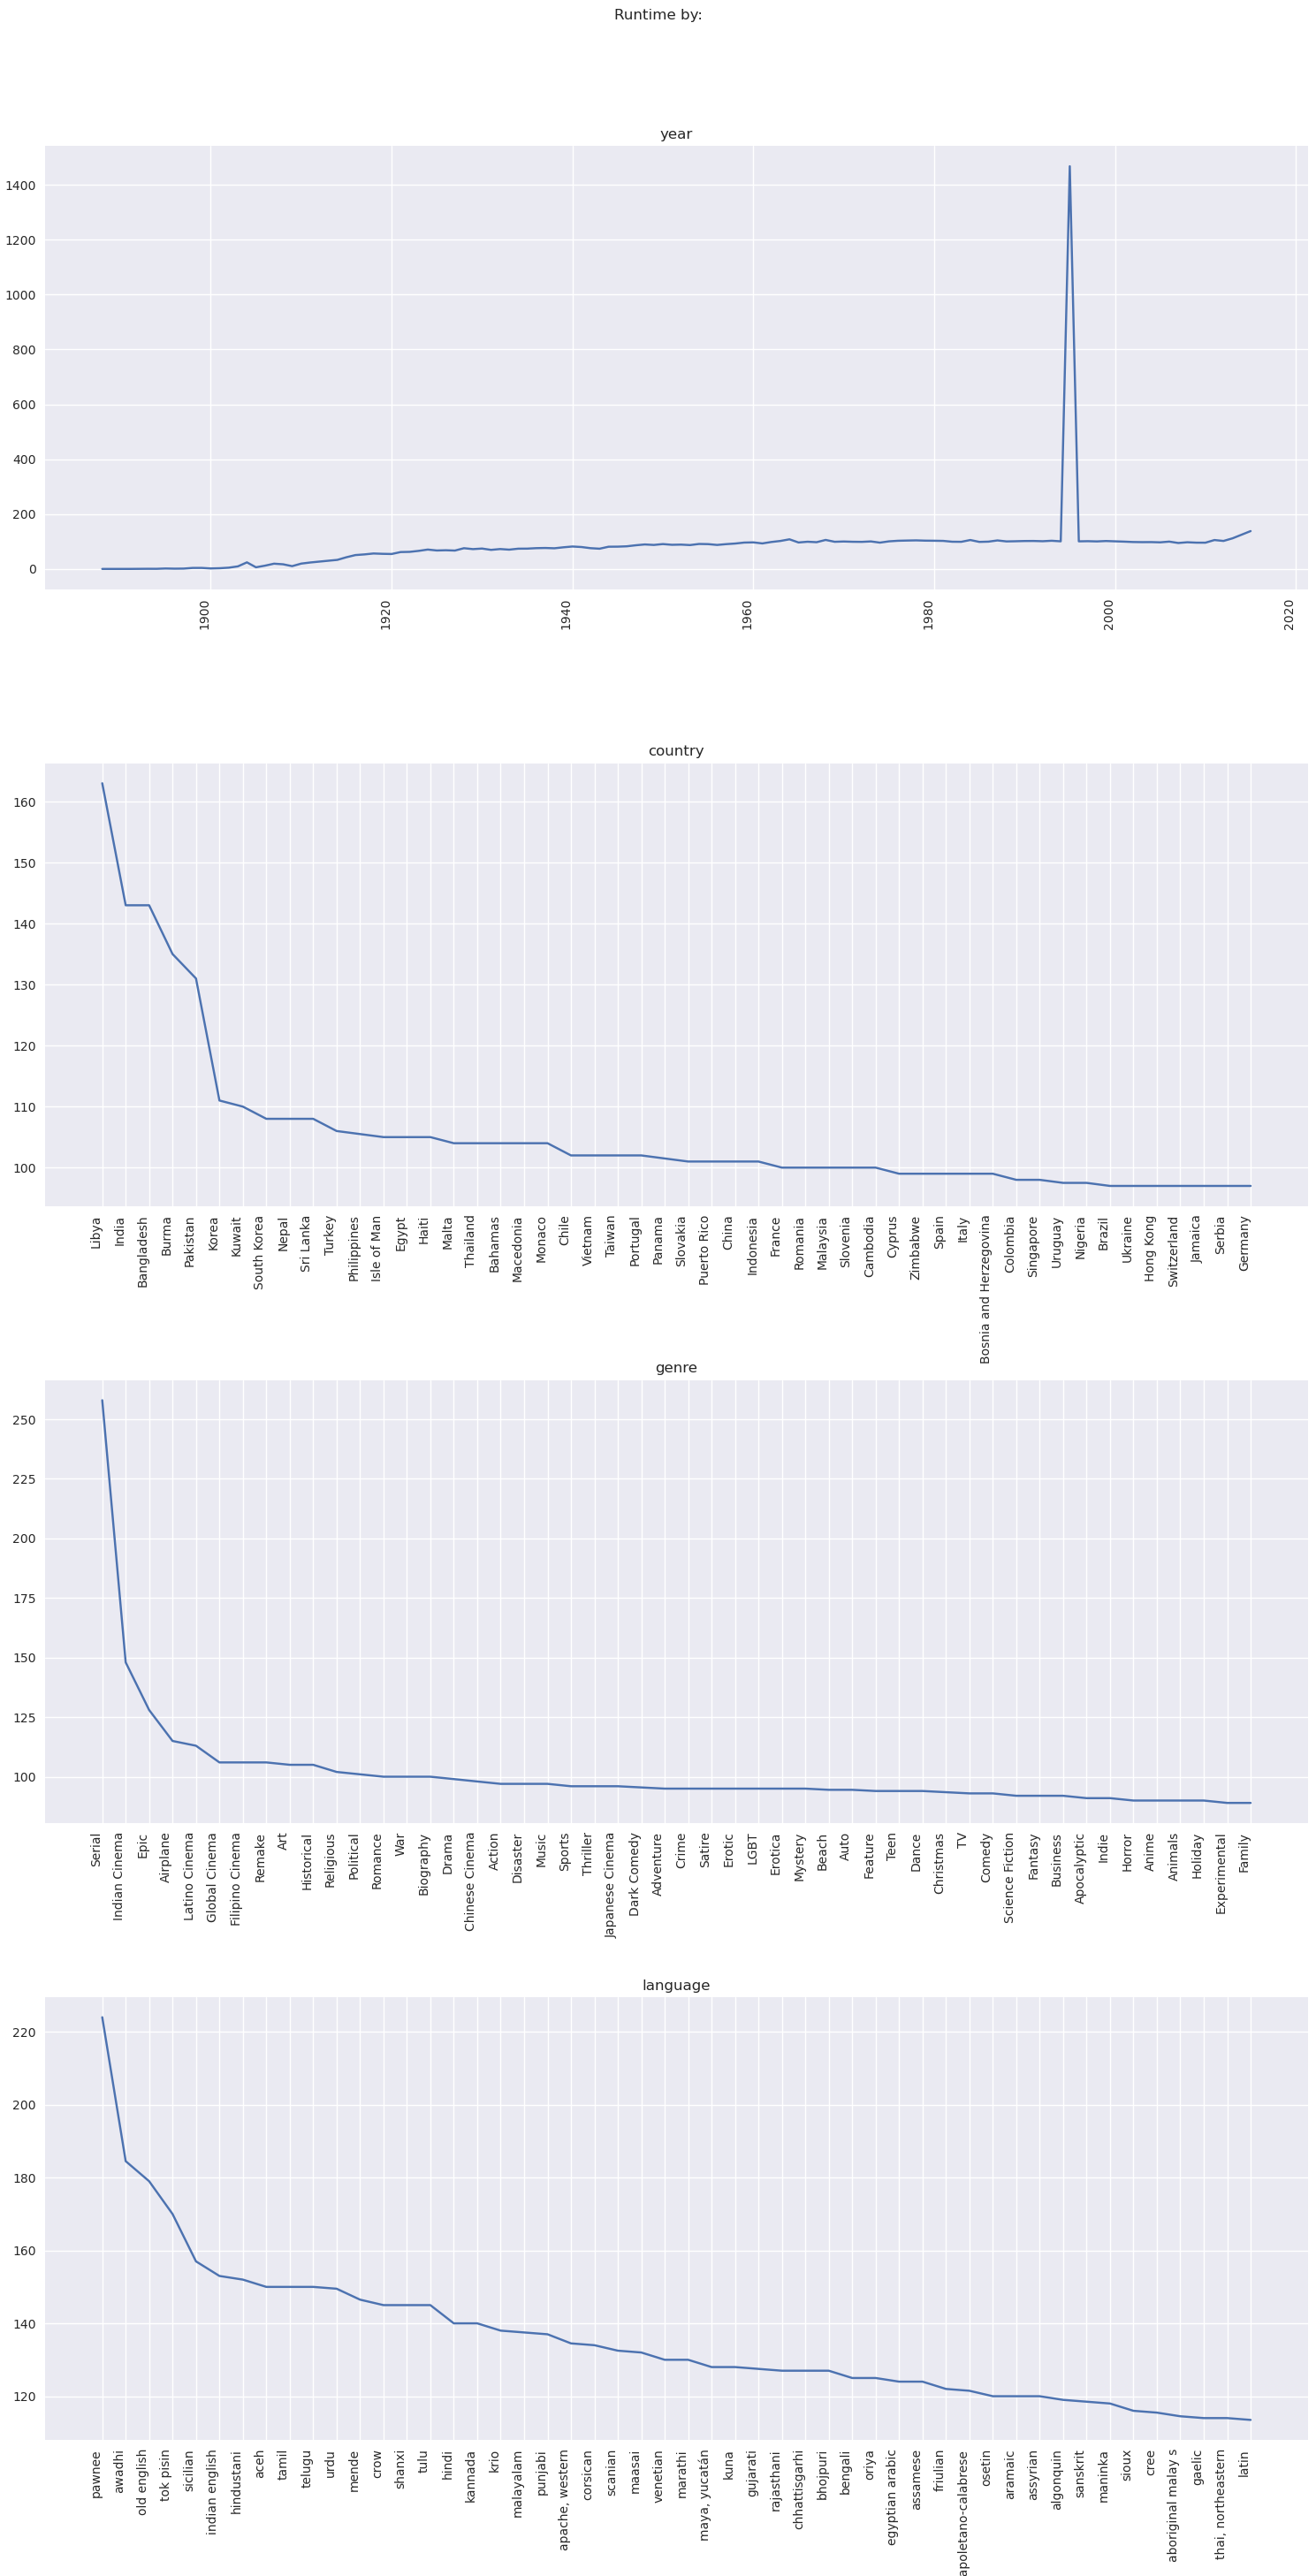

In [288]:
get_distribution_by(movies_processed, "movie_runtime", title="Runtime by:");

Average mumber of languages by film thoughout the time:

We see one significant drop in 1930s and slight increase until the second drop in 2010s 

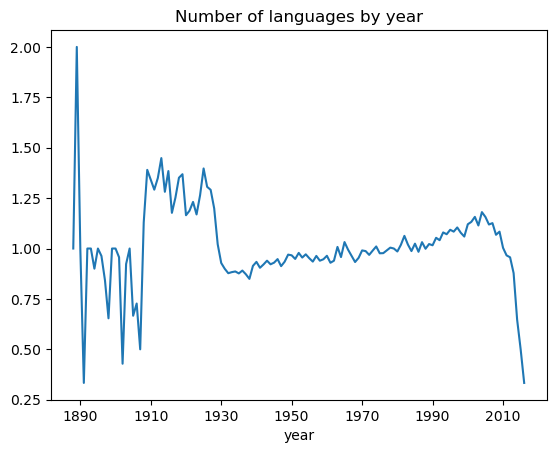

In [340]:
movies_processed["year"] = movies_processed["movie_release_date"].dt.year
movies_processed["language_num"] = movies_processed["languages"].apply(lambda x: len(eval(x)))
movies_processed[["year", "language_num"]].groupby("year")["language_num"].mean().plot(x="year", y="language_num", title="Number of languages by year")
plt.xticks(ticks=[i for i in range(1890, 2021, 20)]);

Average mumber of genres by film thoughout the time:

Slight decrease until 1950 and then slight increase until 2010

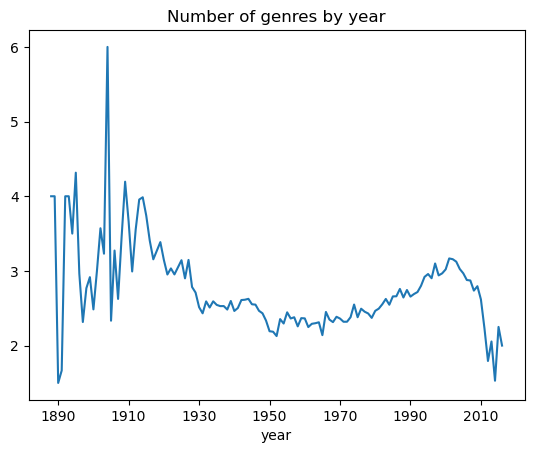

In [341]:
movies_processed["year"] = movies_processed["movie_release_date"].dt.year
movies_processed["genre_num"] = movies_processed["genres"].apply(lambda x: len(eval(x)))
movies_processed[["year", "genre_num"]].groupby("year")["genre_num"].mean().plot(x="year", y="genre_num", title="Number of genres by year")
plt.xticks(ticks=[i for i in range(1890, 2021, 20)]);

It is also quite interesting to look at how the average number of words changed throughout the time.

We see that it is almost constant and doesn't significantly change

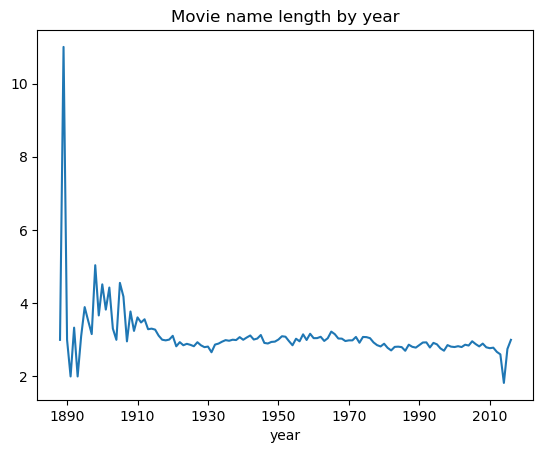

In [344]:
movies_processed["year"] = movies_processed["movie_release_date"].dt.year
movies_processed["movie_name_len"] = movies_processed["movie_name"].apply(lambda x: len(x.split(" ")))
movies_processed[["year", "movie_name_len"]].groupby("year")["movie_name_len"].mean().plot(x="year", y="movie_name_len", title="Movie name length by year")
plt.xticks(ticks=[i for i in range(1890, 2021, 20)]);

Movie number by year. 

We see very fast increase of the number of films by year. Almost 5 times during 100 years

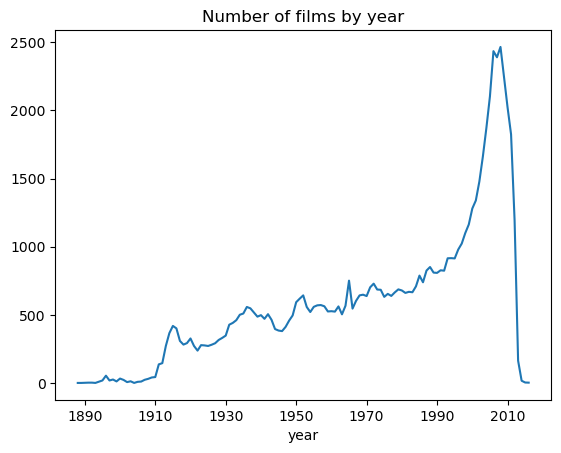

In [345]:
movies_processed["year"] = movies_processed["movie_release_date"].dt.year
movies_processed[["year", "movie_name"]].groupby("year")["movie_name"].count().plot(x="year", y="movine_name", title="Number of films by year")
plt.xticks(ticks=[i for i in range(1890, 2021, 20)]);

# Characters and movies dependencies